Langkah 1: Persiapan Lingkungan di Google Colab
Buka Google Colab.
Buat notebook baru, dan pastikan untuk memilih runtime GPU agar prosesnya lebih cepat. Pilih Runtime > Change runtime type > Hardware accelerator > GPU.

Langkah 2: Unggah Dataset atau Ambil dari Sumber Lain
Jika Anda memiliki dataset di komputer, Anda bisa mengunggahnya langsung ke Colab. Namun, jika dataset berada di Google Drive, ikuti langkah-langkah berikut untuk mengaksesnya:

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Setelah ini, Anda dapat mengakses file di Google Drive Anda di path /content/drive/MyDrive/.

Langkah 3: Instalasi dan Import Library yang Dibutuhkan
Pastikan semua pustaka yang diperlukan sudah diinstal dan diimpor.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import os


Langkah 4: Load Model Pre-Trained dan Fungsi Ekstraksi Fitur
Kita akan menggunakan model ResNet50 yang sudah terlatih tanpa lapisan klasifikasi akhir untuk mengekstraksi fitur gambar.

In [2]:
# Load model ResNet50 tanpa layer akhir untuk ekstraksi fitur
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path):
    # Load gambar dan ubah ukurannya sesuai dengan input model (224x224)
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    # Ekstraksi fitur
    features = base_model.predict(img_data)
    return features.flatten()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


Langkah 5: Ekstraksi Fitur untuk Semua Gambar
Misalkan Anda memiliki folder bernama food_images yang berisi gambar bahan makanan. Mari kita ekstrak fitur untuk setiap gambar dalam folder tersebut dan menyimpannya dalam list.

In [4]:
# Tentukan folder tempat gambar berada
image_folder = 'E:\Capstone Track\Object Detection\Labeling'  # Sesuaikan path-nya

# List untuk menyimpan fitur dari setiap gambar
all_features = []
image_paths = []

for img_file in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_file)
    features = extract_features(img_path)
    all_features.append(features)
    image_paths.append(img_path)

# Ubah list fitur menjadi array numpy
all_features = np.array(all_features)
print("Ekstraksi fitur selesai!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

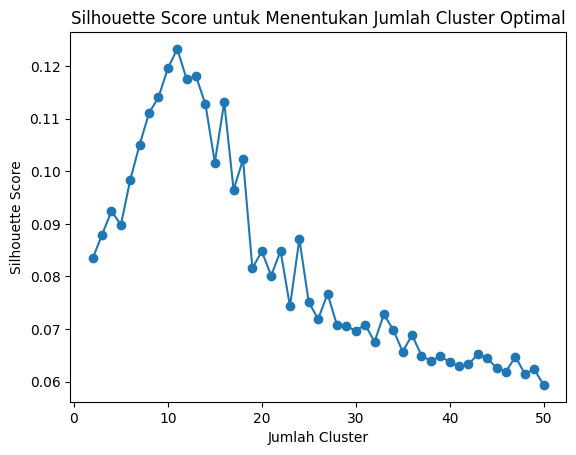

Jumlah cluster optimal berdasarkan Silhouette Score adalah: 11


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

max_clusters = 50  # Tentukan jumlah maksimum cluster yang ingin diuji

silhouette_scores = []

# Hitung Silhouette Score untuk berbagai jumlah cluster
for i in range(2, max_clusters + 1):  # Mulai dari 2 karena silhouette score tidak didefinisikan untuk 1 cluster
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(all_features)

    # Hitung Silhouette Score untuk clustering ini
    score = silhouette_score(all_features, kmeans.labels_)
    silhouette_scores.append(score)

# Visualisasikan Silhouette Scores untuk menemukan jumlah cluster yang optimal
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

# Cari jumlah cluster dengan Silhouette Score tertinggi
optimal_clusters = range(2, max_clusters + 1)[np.argmax(silhouette_scores)]
print(f"Jumlah cluster optimal berdasarkan Silhouette Score adalah: {optimal_clusters}")


Langkah 6: Clustering dengan K-means
Sekarang, kita akan menggunakan algoritma K-means untuk mengelompokkan gambar berdasarkan fitur yang telah diekstraksi.

In [6]:
# Lakukan clustering dengan jumlah cluster optimal yang ditemukan
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(all_features)

# Mendapatkan label untuk setiap gambar setelah clustering
clusters = kmeans.labels_


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Langkah 7: Visualisasi Hasil Clustering
Kita bisa membuat plot untuk melihat beberapa gambar dari setiap cluster.

Cluster 1


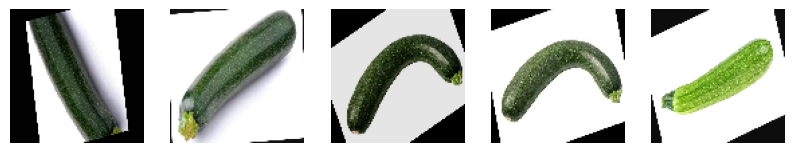

Cluster 2


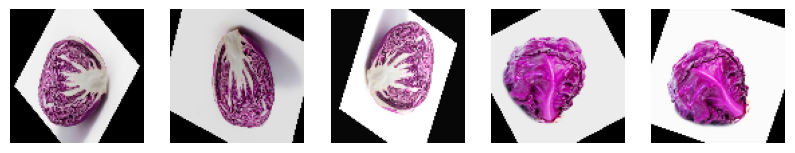

Cluster 3


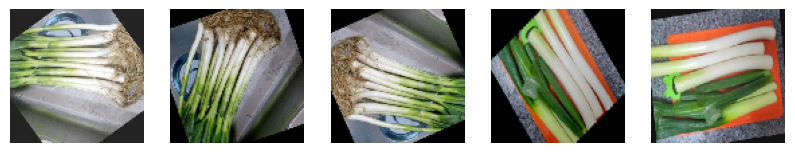

Cluster 4


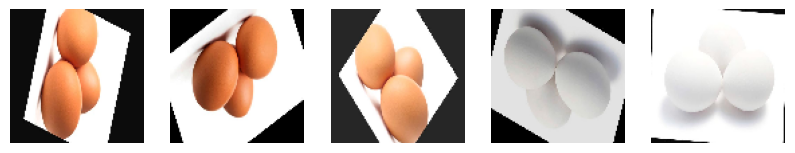

Cluster 5


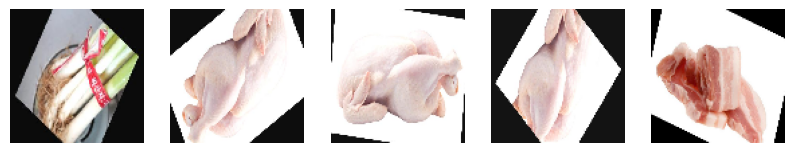

Cluster 6


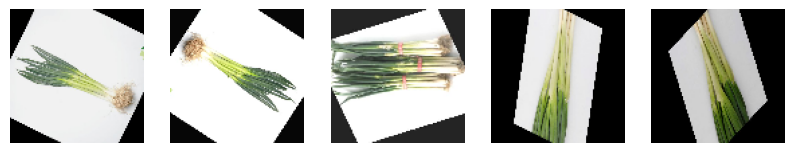

Cluster 7


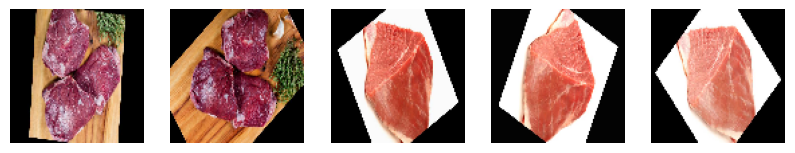

Cluster 8


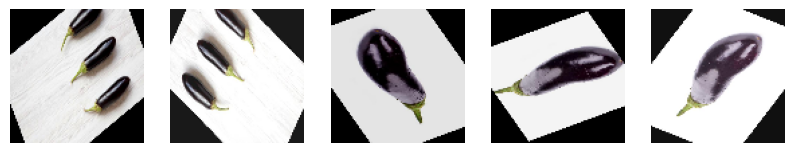

Cluster 9


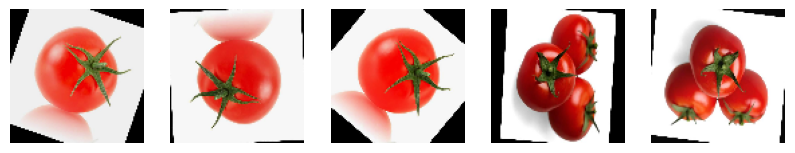

Cluster 10


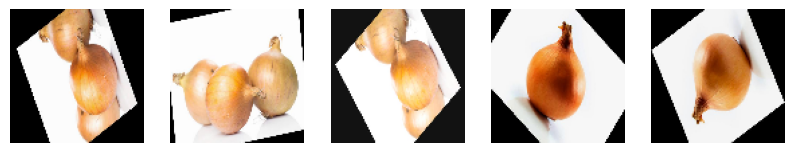

Cluster 11


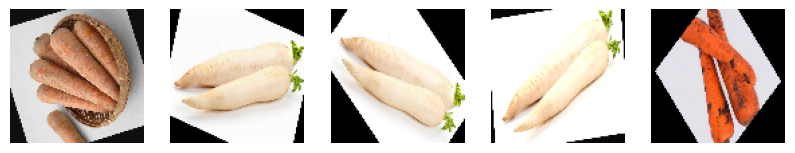

In [7]:
# Visualisasi gambar-gambar dalam setiap cluster (misalnya, 5 gambar pertama dalam setiap cluster)
for i in range(optimal_clusters):
    print(f"Cluster {i + 1}")
    cluster_indices = np.where(clusters == i)[0]  # Cari index gambar dalam cluster ini
    sample_images = cluster_indices[:5]  # Ambil contoh 5 gambar pertama dari cluster ini

    plt.figure(figsize=(10, 5))
    for j, idx in enumerate(sample_images):
        img = image.load_img(image_paths[idx], target_size=(100, 100))  # Resize gambar untuk visualisasi
        plt.subplot(1, 5, j + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()


Langkah 8: Menyimpan Hasil Clustering
Jika Anda ingin menyimpan hasil clustering untuk penggunaan lebih lanjut, Anda bisa menyimpan cluster label dan path gambar dalam format CSV.

Penjelasan Tambahan
Ekstraksi Fitur: Kita menggunakan model ResNet50 untuk mengubah setiap gambar menjadi vektor fitur yang dapat dibandingkan oleh algoritma K-means.
Clustering dengan K-means: K-means mengelompokkan gambar berdasarkan kesamaan fitur. Gambar dalam satu cluster diharapkan memiliki kemiripan visual.
Visualisasi: Visualisasi ini membantu Anda memeriksa apakah gambar dalam satu cluster benar-benar serupa.
Tips
Eksperimen dengan Jumlah Cluster: Anda mungkin perlu mencoba beberapa jumlah cluster (num_clusters) yang berbeda untuk menemukan pengelompokan yang paling sesuai.
Penggunaan Model Lain: Jika ResNet50 tidak menghasilkan fitur yang cukup baik, Anda dapat mencoba model lain, seperti VGG atau Inception, yang mungkin lebih sesuai dengan dataset Anda.

In [ ]:
import os
import shutil
from tqdm import tqdm 

# Tentukan path tempat gambar-gambar asli berada dan direktori tempat folder cluster akan dibuat
original_images_folder = 'E:\Capstone Track\Object Detection\Labeling'
output_folder = 'E:\Capstone Track\Object Detection\sorted_image'

# Buat folder output jika belum ada
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Buat subfolder untuk setiap cluster (misalnya: Cluster 0, Cluster 1, ..., Cluster 10)
for i in range(11):  # Jumlah range sesuaikan dengan jumlah cluster
    cluster_folder = os.path.join(output_folder, f"Cluster_{i}")
    if not os.path.exists(cluster_folder):
        os.makedirs(cluster_folder)

# Menyortir gambar berdasarkan cluster yang sudah didapatkan
image_paths = [os.path.join(original_images_folder, fname) for fname in os.listdir(original_images_folder)]
for i, image_path in tqdm(enumerate(image_paths), total=len(image_paths)):
    # Tentukan folder cluster berdasarkan hasil label clustering (dari kmeans.labels_)
    cluster_label = clusters[i]  # Menggunakan label cluster yang didapat dari KMeans
    cluster_folder = os.path.join(output_folder, f"Cluster_{cluster_label}")

    # Pindahkan gambar ke folder yang sesuai dengan cluster-nya
    shutil.copy(image_path, cluster_folder)  # Menggunakan shutil.copy untuk menyalin gambar


100%|██████████| 10717/10717 [01:46<00:00, 101.04it/s]
